## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAJED considerando as suas colunas.

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**.


In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:/Users/Manfredi/Google Drive/Digital House/Aulas/08 Desafio 1-20190724/CAGEDEST_122018.txt'
                   , delimiter=';'
                   , usecols=[9, 12, 15, 16, 18], encoding='latin-1') 

In [3]:
data.columns # usecols=[9, 12, 15, 16, 18]

Index(['Grau Instrução', 'Idade', 'Raça Cor', 'Salário Mensal', 'Sexo'], dtype='object')

In [4]:
data.shape

(2256752, 5)

In [5]:
data.head(5)

,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo
0,6,24,8,"000954,00",1
1,8,25,2,"002500,00",1
2,2,55,8,"000000,00",1
3,2,52,8,"000000,00",1
4,2,32,8,"000000,00",1


In [6]:
# RENOMEANDO A COLUNA Salário Mensal PARA Salario_Mensal
data.rename(columns={"Salário Mensal": "Salario_Mensal"}, inplace=True)

In [7]:
# Substituindo a virgula pelo ponto na coluna Salario_Mensal
data['Salario_Mensal'] = [x.replace(',', '.') for x in data['Salario_Mensal']]

In [8]:
# Transformando o type de Salario_Mensal para float
data['Salario_Mensal'] = data['Salario_Mensal'].astype(float)
data['Salario_Mensal'].dtypes

dtype('float64')

In [9]:
# CONTAGEM DE SALÁRIOS
data.Salario_Mensal.value_counts(ascending=False)

954.0      95704
1500.0     24390
1200.0     24382
0.0        24245
1050.0     18745
1300.0     17894
1110.0     17597
1108.0     16460
1000.0     15681
477.0      15585
1100.0     14865
1185.0     12988
2000.0     12105
1405.0     10886
1400.0     10795
1800.0     10561
1150.0     10471
1752.0      8980
1250.0      8815
1600.0      8792
1440.0      8300
1107.0      8288
1020.0      8135
1030.0      7988
997.0       7865
1194.0      7822
990.0       7606
2500.0      7306
977.0       6843
1396.0      6826
           ...  
8978.0         1
14832.0        1
23811.0        1
14830.0        1
14829.0        1
14827.0        1
14818.0        1
8979.0         1
8970.0         1
14862.0        1
23827.0        1
14864.0        1
14917.0        1
14914.0        1
14904.0        1
14903.0        1
14902.0        1
14901.0        1
14895.0        1
14894.0        1
14888.0        1
14883.0        1
14877.0        1
14876.0        1
14874.0        1
14873.0        1
14872.0        1
8965.0        

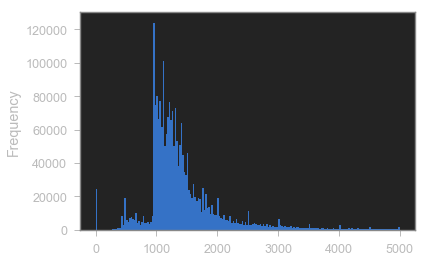

In [10]:
data.Salario_Mensal.plot.hist(bins=200, range=(-1, 5000))

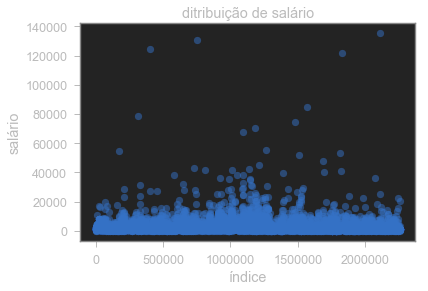

In [11]:
sample = data.sample(50000)
plt.scatter(y=sample.Salario_Mensal, x=sample.Salario_Mensal.index, alpha=0.5)
plt.title('ditribuição de salário')
plt.xlabel('índice')
plt.ylabel('salário')
plt.show()

In [12]:
data.shape

(2256752, 5)

In [13]:
# Foi observado nos gráficos acima que existe uma quantidade baixa de salários zerados
# E em relação a base ela equivale a 1% dos registros totais apenas.
salario_zerado = data['Salario_Mensal'] == 0
dfsalario_zerado = data[salario_zerado]
porcentagem_zerado = (dfsalario_zerado.Salario_Mensal.value_counts() / data.shape[0]) * 100
print(porcentagem_zerado)

0.0    1.074332
Name: Salario_Mensal, dtype: float64


In [14]:
# ANÁLISE DOS SALÁRIOS MAIORES QUE 60K
maiorque60k = (data['Salario_Mensal'] > 60000)
dataframe60k = data[maiorque60k]
dataframe60k.shape
#dataframe60k.Salario_Mensal.value_counts().head(20)
# Manti os salários acima de 60k pois em minha opnião estes valores são reais

(353, 5)

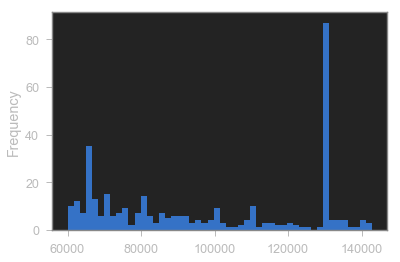

In [15]:
# PLOTANDO O HISTOGRAMA DOS SALÁRIOS ACIMA DE 60K
dataframe60k.Salario_Mensal.plot.hist(bins=50)

Text(0, 0.5, 'Salários')

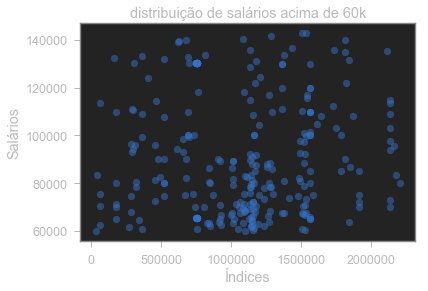

In [16]:
plt.scatter(y=dataframe60k.Salario_Mensal, x=dataframe60k.Salario_Mensal.index, alpha=0.5)
plt.title('distribuição de salários acima de 60k')
plt.xlabel('Índices')
plt.ylabel('Salários')

In [17]:
# Removendo os valores zerados
maiorque0 = data['Salario_Mensal'] > 0
dataframe = data[maiorque0]
dataframe.shape

(2232507, 5)

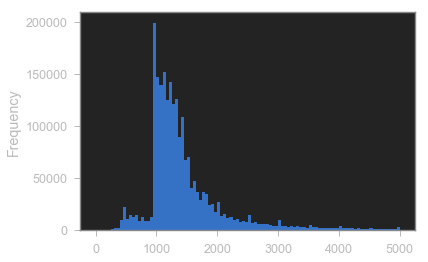

In [18]:
# PLOTANDO O HISTOGRAMA SEM OS OUTLIERS
dataframe.Salario_Mensal.plot.hist(bins=100, range=(-1, 5000))

<function matplotlib.pyplot.show(*args, **kw)>

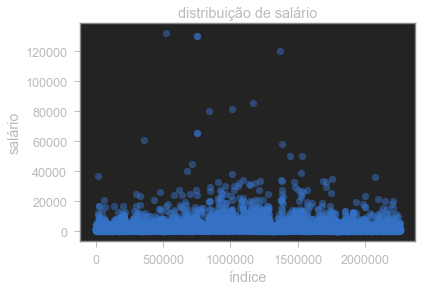

In [19]:
# PLOTANDO A DISPERSÃO SEM OS OUTLIERS
sample = dataframe.sample(50000)
plt.scatter(y=sample.Salario_Mensal, x=sample.Salario_Mensal.index, alpha=0.5)
plt.title('distribuição de salário')
plt.xlabel('índice')
plt.ylabel('salário')
plt.show

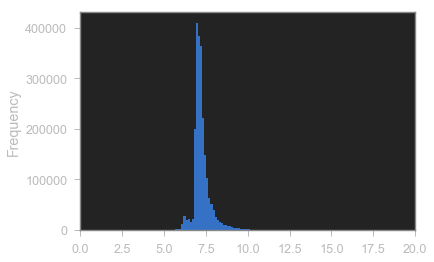

In [20]:
# APLICANDO O LOG PARA CORRIGIR A CURVA
dataframe['log_salario'] = np.log1p(dataframe['Salario_Mensal'])
dataframe['log_salario'].plot.hist(bins=50, xlim=(0, 20))

# jogada do log é: torturar os dados e acaba tendo uma interpretação em percentual dos dados
# e não mais em nível (valor absoluto / valor real)

## Teste de normalidade Salario_Mensal

media = 7.24 and desvio padrao = 0.47


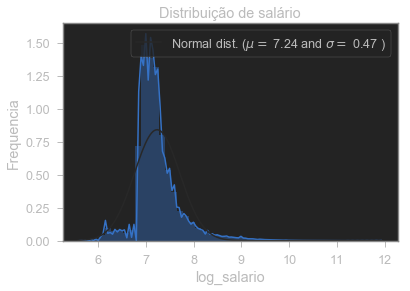

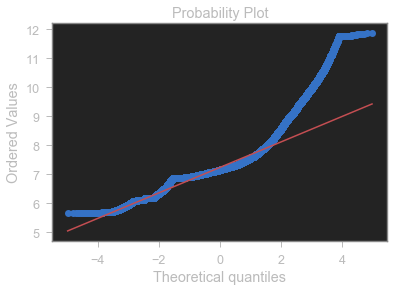

In [21]:
import seaborn as sns
from scipy import stats

sns.distplot(dataframe['log_salario'], fit=stats.norm)

(media, desviopadrao) = stats.norm.fit(dataframe['log_salario'])
print(f'media = {media:.2f} and desvio padrao = {desviopadrao:.2f}')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(media, desviopadrao)],
            loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição de salário')

fig = plt.figure()
res = stats.probplot(dataframe['log_salario'], plot=plt)
plt.show()

### 3 - Verificação dos dados da variável Idade: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

In [22]:
# Analisando menores de idade
menor18 = dataframe['Idade'] < 18
dataframemenor18 = dataframe[menor18]
dataframemenor18.Idade.value_counts()

17    25047
16    14511
15     5075
14      701
10       15
11        9
12        7
13        6
Name: Idade, dtype: int64

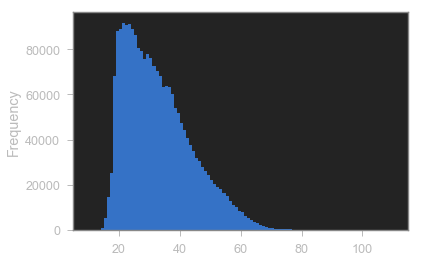

In [23]:
# PLOTANDO O HISTOGRAMA DE IDADES
dataframe.Idade.plot.hist(bins=100, range=(10, 110))

<function matplotlib.pyplot.show(*args, **kw)>

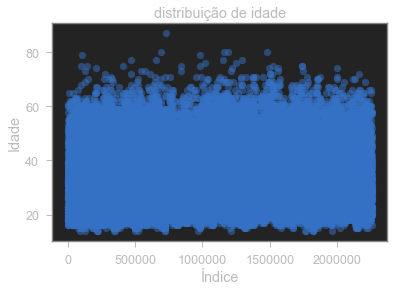

In [24]:
# Pegando uma amostra de 50k de idade e plotando o gráfico de dispersão
sample = dataframe.sample(50000)
plt.scatter(y=sample.Idade, x=sample.Idade.index, alpha=0.5)
plt.title('distribuição de idade')
plt.ylabel('Idade')
plt.xlabel('Índice')
plt.show

## Cálculando a correlação de idade e salário

In [25]:
dfidadevssalario = dataframe[['Idade', 'Salario_Mensal']]
print(dfidadevssalario.corr().round(2))
print()
print('Aqui quer dizer que a correlação entre idade e salario_mensal é bem fraca (0.00 a 0.19) ou seja')
print('se uma variável sobe ou desce, não quer dizer que a outra fará o mesmo')

                Idade  Salario_Mensal
Idade            1.00            0.15
Salario_Mensal   0.15            1.00

Aqui quer dizer que a correlação entre idade e salario_mensal é bem fraca (0.00 a 0.19) ou seja
se uma variável sobe ou desce, não quer dizer que a outra fará o mesmo


### 4 Verificação dos dados da variável Grau de Instrução: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

### Tabela grau de instrução

* Analfabeto_______________1
* Até 5ª Incompleto	_______2
* 5ª Completo Fundamental__3
* 6ª a 9ª Fundamental______4
* Fundamental Completo_____5
* Médio Incompleto_________6
* Médio Completo___________7
* Superior Incompleto______8
* Superior Completo________9
* MESTRADO________________10
* DOUTORADO_______________11
* IGNORADO________________-1

In [26]:
# RENOMEANDO A COLUNA GRAU INSTRUÇÃO PARA Grau_Instrucao
dataframe.rename(columns={'Grau Instrução': 'Grau_Instrucao'}, inplace=True)

In [27]:
# TROCANDO O TIPO PRIMITIVO DE GRAU_INSTRUCAO PARA STRING
dataframe['Grau_Instrucao_STR'] = dataframe.Grau_Instrucao.astype(str, inplace=True)

In [28]:
# VERIFICANDO SE O TIPO PRIMITIVO FOI TROCADO
dataframe['Grau_Instrucao_STR'].dtype

dtype('O')

In [29]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
dataframe.Grau_Instrucao_STR.replace({'1': 'Analfabeto',
                              '2': 'Até 5ª Incompleto',
                              '3': '5ª Completo Fundamental',
                              '4': '6ª a 9ª Fundamental',
                              '5': 'Fundamental Completo',
                              '6': 'Médio Incompleto',
                              '7': 'Médio Completo',
                              '8': 'Superior Incompleto',
                              '9': 'Superior Completo',
                              '10': 'Mestrado',
                              '11': 'Doutorado',
                              '-1': 'IGNORADO'}, inplace=True)

In [30]:
dataframe.head()

,Grau_Instrucao,Idade,Raça Cor,Salario_Mensal,Sexo,log_salario,Grau_Instrucao_STR
0,6,24,8,954.0,1,6.861711,Médio Incompleto
1,8,25,2,2500.0,1,7.824446,Superior Incompleto
7,4,50,2,1061.0,2,6.967909,6ª a 9ª Fundamental
11,7,22,8,1061.0,1,6.967909,Médio Completo
12,7,37,2,1061.0,1,6.967909,Médio Completo


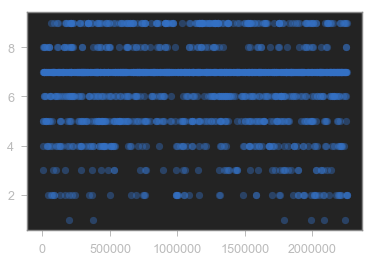

In [31]:
# VERIFICANDO A DISPERSÃO DE IDADE
sample = dataframe.sample(2000)
plt.scatter(y=sample.Grau_Instrucao, x=sample.Grau_Instrucao.index, alpha=0.4)

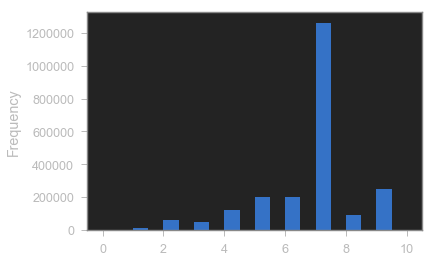

In [32]:
# CRIANDO UM HISTOGRAMA
dataframe.Grau_Instrucao.plot.hist(bins=20, range=(0, 10))

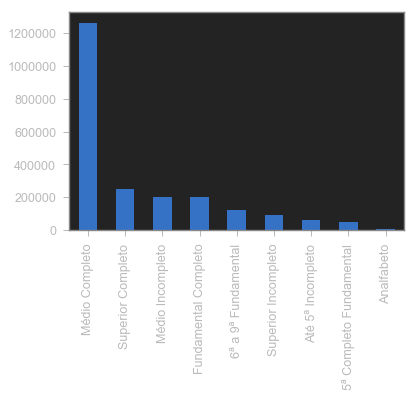

In [33]:
dataframe.Grau_Instrucao_STR.value_counts().plot(kind='bar')

In [34]:
# FAZENDO A CORRELAÇÃO ENTRE A VARIÁVEL GRAU INSTRUÇÃO E SALÁRIO
dfgrauinstrucaovssalario = dataframe[['Grau_Instrucao', 'Salario_Mensal']]
print(dfgrauinstrucaovssalario.corr().round(2))
print()
print('Aqui quer dizer que a correlação entre Grau_Instrucao e Salario_Mensal é bem fraca (0.00 a 0.19) ou seja')
print('se uma variável sobe ou desce, não quer dizer que a outra fará o mesmo')

                Grau_Instrucao  Salario_Mensal
Grau_Instrucao            1.00            0.19
Salario_Mensal            0.19            1.00

Aqui quer dizer que a correlação entre Grau_Instrucao e Salario_Mensal é bem fraca (0.00 a 0.19) ou seja
se uma variável sobe ou desce, não quer dizer que a outra fará o mesmo


### 5 Verificação dos dados da variável Sexo: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

In [35]:
# No dataset existem mais homens do que mulheres
dataframe.Sexo.value_counts()

1    1310312
2     922195
Name: Sexo, dtype: int64

### DICIONÁRIO DADOS SEXO
* 1 = MASCULINO
* 2 = FEMININO

In [36]:
# Criando uma nova coluna e transformando os dados para string
dataframe['Sexo_STR'] = dataframe.Sexo.astype(str)

In [37]:
# Alterando os valores 1 para Masculino e 2 para Feminino
dataframe.Sexo_STR.replace({'1': 'Masculino',
                            '2': 'Feminino'}, inplace=True)

In [38]:
dataframe.head()

,Grau_Instrucao,Idade,Raça Cor,Salario_Mensal,Sexo,log_salario,Grau_Instrucao_STR,Sexo_STR
0,6,24,8,954.0,1,6.861711,Médio Incompleto,Masculino
1,8,25,2,2500.0,1,7.824446,Superior Incompleto,Masculino
7,4,50,2,1061.0,2,6.967909,6ª a 9ª Fundamental,Feminino
11,7,22,8,1061.0,1,6.967909,Médio Completo,Masculino
12,7,37,2,1061.0,1,6.967909,Médio Completo,Masculino


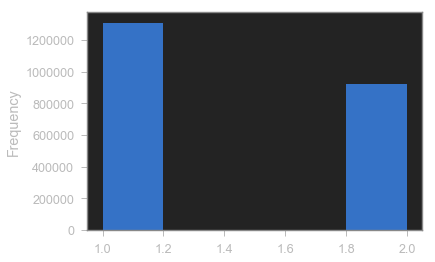

In [39]:
# Plotando o gráfico de distribuição
dataframe.Sexo.plot.hist(bins=5, range=(1, 2))

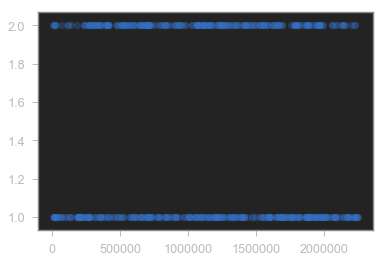

In [40]:
# Plotando o gráfico de dispersão
sample = dataframe.sample(500)
plt.scatter(y=sample.Sexo, x=sample.Sexo.index, alpha=0.3)

In [41]:
# Calculando a correlação de salario_mensal com sexo
dfsexovssalariomensal = dataframe[['Sexo', 'Salario_Mensal']]
print(dfsexovssalariomensal.corr().round(2))
print()
print('A correlação entre as variáveis Sexo e Salário Mensal são bem fracas')

                Sexo  Salario_Mensal
Sexo            1.00           -0.04
Salario_Mensal -0.04            1.00

A correlação entre as variáveis Sexo e Salário Mensal são bem fracas


In [42]:
dfsexovssalariomensal.groupby('Sexo').mean()

,Salario_Mensal
Sexo,
1,1718.585699
2,1540.241696


In [43]:
dataframe.head()

,Grau_Instrucao,Idade,Raça Cor,Salario_Mensal,Sexo,log_salario,Grau_Instrucao_STR,Sexo_STR
0,6,24,8,954.0,1,6.861711,Médio Incompleto,Masculino
1,8,25,2,2500.0,1,7.824446,Superior Incompleto,Masculino
7,4,50,2,1061.0,2,6.967909,6ª a 9ª Fundamental,Feminino
11,7,22,8,1061.0,1,6.967909,Médio Completo,Masculino
12,7,37,2,1061.0,1,6.967909,Médio Completo,Masculino


In [44]:
# Criando uma coluna do log padronizado (distribuição padronizada) ou seja, transformando os valores do log
# em score-z
dataframe['log_padronizado_scorez'] = ( dataframe['log_salario'] - dataframe['log_salario'].mean() ) / dataframe['log_salario'].std() 

In [45]:
# Criando um dataframe só de homens
homens = dataframe['Sexo'] == 1
dataframehomens = dataframe[homens]

In [46]:
# Criando um dataframe só de mulheres
mulheres = dataframe['Sexo'] == 2
dataframemulheres = dataframe[mulheres]

In [47]:
# Criando uma coluna com o score-z do log para os homens
dataframehomens['log_padronizado_salario_homens'] = ( dataframehomens['log_salario'] - dataframehomens['log_salario'].mean() ) / ( dataframehomens['log_salario'].std() ) 

In [48]:
# Criando uma coluna com o score-z do log para as mulheres
dataframemulheres['log_padronizado_salario_mulheres'] = ( dataframemulheres['log_salario'] - dataframemulheres['log_salario'].mean() ) / ( dataframemulheres['log_salario'].std() )                  

In [49]:
# Calculando a média e o desvio padrão dos homens
mediapadronizadahomens = dataframehomens['log_padronizado_salario_homens'].mean()
desviopadraopadronizadohomens = dataframehomens['log_padronizado_salario_homens'].std()
mediapadronizadahomens, desviopadraopadronizadohomens

(2.5932579894274958e-11, 1.0000000000003053)

In [50]:
# Calculando a média e o desvio padrão das mulheres
mediapadronizadamulheres = dataframemulheres['log_padronizado_salario_mulheres'].mean()
desviopadraopadronizadomulheres = dataframemulheres['log_padronizado_salario_mulheres'].std()
mediapadronizadamulheres, desviopadraopadronizadomulheres

(4.3494962263891254e-11, 0.9999999999987552)

In [51]:
# VERIFICANDO OS SCORE-Z
scipy.stats.norm.interval(alpha=0.95,
                          loc = mediapadronizadahomens, scale = desviopadraopadronizadohomens)

(-1.9599639845147199, 1.959963984566585)

In [52]:
salariohomemmin = dataframehomens.log_padronizado_salario_homens.round(2) == -1.96
dfsalariominhomem = dataframehomens[salariohomemmin]
salminhomem = dfsalariominhomem[['Salario_Mensal', 'log_padronizado_salario_homens']].min()
salminhomem

Salario_Mensal                    565.000000
log_padronizado_salario_homens     -1.962404
dtype: float64

In [53]:
salariohomemmax = dataframehomens.log_padronizado_salario_homens.round(2) == 1.96
dfsalariomaxhomem = dataframehomens[salariohomemmax]
salmaxhomem = dfsalariomaxhomem[['Salario_Mensal', 'log_padronizado_salario_homens']].max()
salmaxhomem

Salario_Mensal                    3710.000000
log_padronizado_salario_homens       1.964841
dtype: float64

In [54]:
salariominmulheres = dataframemulheres.log_padronizado_salario_mulheres.round(2) == -1.96
dfsalariominmulheres = dataframemulheres[salariominmulheres]
salminmulher = dfsalariominmulheres[['Salario_Mensal', 'log_padronizado_salario_mulheres']].min()
salminmulher

Salario_Mensal                      529.000000
log_padronizado_salario_mulheres     -1.961585
dtype: float64

In [55]:
salariomaxmulheres = dataframemulheres.log_padronizado_salario_mulheres.round(2) == 1.96
dfsalariomaxmulheres = dataframemulheres[salariomaxmulheres]
salmaxmulher = dfsalariomaxmulheres[['Salario_Mensal', 'log_padronizado_salario_mulheres']].max()
salmaxmulher

Salario_Mensal                      3266.000000
log_padronizado_salario_mulheres       1.964688
dtype: float64

In [56]:
print(f'Sal min homens = {salminhomem[0]} scorez = {salminhomem[1]}')
print(f'Sal max homens {salmaxhomem[0]} scorez = {salmaxhomem[1]}')
print(f'Sal min mulheres = {salminmulher[0]} scorez = {salminmulher[1]}')
print(f'Sal max mulheres {salmaxmulher[0]} scorez = {salmaxmulher[1]}')

Sal min homens = 565.0 scorez = -1.9624040027845062
Sal max homens 3710.0 scorez = 1.9648414906536718
Sal min mulheres = 529.0 scorez = -1.9615849341830813
Sal max mulheres 3266.0 scorez = 1.9646875308751859


In [57]:
dataframe.head(10)

,Grau_Instrucao,Idade,Raça Cor,Salario_Mensal,Sexo,log_salario,Grau_Instrucao_STR,Sexo_STR,log_padronizado_scorez
0,6,24,8,954.0,1,6.861711,Médio Incompleto,Masculino,-0.793077
1,8,25,2,2500.0,1,7.824446,Superior Incompleto,Masculino,1.234427
7,4,50,2,1061.0,2,6.967909,6ª a 9ª Fundamental,Feminino,-0.569426
11,7,22,8,1061.0,1,6.967909,Médio Completo,Masculino,-0.569426
12,7,37,2,1061.0,1,6.967909,Médio Completo,Masculino,-0.569426
13,6,20,2,1061.0,1,6.967909,Médio Incompleto,Masculino,-0.569426
14,2,39,2,1026.0,1,6.934397,Até 5ª Incompleto,Masculino,-0.640002
15,5,25,8,1061.0,1,6.967909,Fundamental Completo,Masculino,-0.569426
16,5,22,9,1061.0,1,6.967909,Fundamental Completo,Masculino,-0.569426
17,5,18,8,1700.0,1,7.438972,Fundamental Completo,Masculino,0.422624


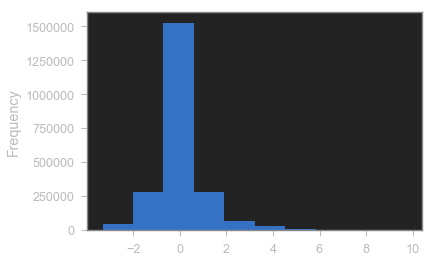

In [58]:
# Vericando a curva agora do log_padronizado_scorez
dataframe['log_padronizado_scorez'].plot.hist()

In [59]:
log_padronizado_salario = dataframe['log_padronizado_scorez']

media_padronizada_salario = np.mean(log_padronizado_salario)
desvio_padrao_log_padronizado_salario = np.std(log_padronizado_salario)
media_padronizada_salario, desvio_padrao_log_padronizado_salario

(1.1029010760011298e-11, 0.9999997760371009)

In [60]:
# z-score para a distribuição padronizada 
# significa que quem recebe menos que o z-score minimo, está abaixo da média salarial 
# e quem recebe mais que o z-score maximo está acima, tudo isso dentro de um intervalo de confiança de 95% 

# ONDE alpha é o intervalo de confiança, loc é a média e scale é o desvio padrão
scipy.stats.norm.interval(alpha=0.95,
                          loc = media_padronizada_salario, scale = desvio_padrao_log_padronizado_salario)

(-1.959963545569809, 1.959963545591867)

In [61]:
# calculando o p-value para a distribuição padronizada
# neste caso tem uma evidência sugestiva
p_value = scipy.stats.norm(media_padronizada_salario,
                 desvio_padrao_log_padronizado_salario).pdf(2 * desvio_padrao_log_padronizado_salario)
p_value

0.05399097860635508

In [62]:
# Calculando o alpha máximo
alpha_max = 1 - p_value
alpha_max

0.946009021393645

In [63]:
# Filtrando os homens com salário acima da média pelo log de salário scorez
homens_acima_media_zscore = (dataframe['log_padronizado_scorez'] > 1.9599) & (dataframe['Sexo'] == 1)
df_salario_homens_acima_media = dataframe[homens_acima_media_zscore]

In [64]:
# Filtrando as mulheres com o salário acima da média pelo log de salário scorez
mulheres_acima_media_zscore = (dataframe['log_padronizado_scorez'] > 1.9599) & (dataframe['Sexo'] == 2)
df_salario_mulheres_acima_media = dataframe[mulheres_acima_media_zscore]

In [65]:
# Filtrando os homens com salário abaixo da média pelo log de salário scorez
homens_abaixo_media_zscore = (dataframe['log_padronizado_scorez'] < -1.9599) & (dataframe['Sexo'] == 1)
df_salario_homens_abaixo_media = dataframe[homens_abaixo_media_zscore]

In [66]:
# Filtrando as mulheres com o salário abaixo da média pelo log de salário scorez
mulheres_abaixo_media_zscore = (dataframe['log_padronizado_scorez'] < -1.9599) & (dataframe['Sexo'] == 2)
df_salario_mulheres_abaixo_media = dataframe[mulheres_abaixo_media_zscore]

In [67]:
# Porcentagem de homens que recebem acima da média
( df_salario_homens_acima_media.shape[0] / dataframe[dataframe['Sexo'] == 1].shape[0] ) * 100

4.659271990182491

In [68]:
# Porcentagem de mulheres que recebem acima da média
( df_salario_mulheres_acima_media.shape[0] / dataframe[dataframe['Sexo'] == 2].shape[0] ) * 100

4.000563872066103

In [69]:
# Porcentagem de homens que recebem abaixo da média
( df_salario_homens_abaixo_media.shape[0] / dataframe[dataframe['Sexo'] == 1].shape[0] ) * 100

1.7055479916233691

In [70]:
# Porcentagem de mulheres que recebem abaixo da média
( df_salario_mulheres_abaixo_media.shape[0] / dataframe[dataframe['Sexo'] == 2].shape[0] ) * 100

2.50511009059906

In [71]:
print(f'Sal min homens = {salminhomem[0]} scorez = {salminhomem[1]}')
print(f'Sal max homens {salmaxhomem[0]} scorez = {salmaxhomem[1]}')
print(f'Sal min mulheres = {salminmulher[0]} scorez = {salminmulher[1]}')
print(f'Sal max mulheres {salmaxmulher[0]} scorez = {salmaxmulher[1]}')

Sal min homens = 565.0 scorez = -1.9624040027845062
Sal max homens 3710.0 scorez = 1.9648414906536718
Sal min mulheres = 529.0 scorez = -1.9615849341830813
Sal max mulheres 3266.0 scorez = 1.9646875308751859


In [72]:
scipy.stats.norm.interval(alpha=0.95, loc=mediapadronizadamulheres, scale=desviopadraopadronizadomulheres)[0] < mediapadronizadahomens < scipy.stats.norm.interval(alpha=0.95, loc=mediapadronizadamulheres, scale=desviopadraopadronizadomulheres)[1] 

True

-----

## 6 Verificação dos dados da variável Raça Cor: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

### Dicionário de dados Raça Cor
* INDIGENA___ 1
* BRANCA_____ 2
* PRETA______ 4
* AMARELA____ 6
* PARDA______ 8
* NÃO IDENT__ 9
* IGNORADO__ -1

In [73]:
# Renomeando a coluna Raça Cor para Raca_Cor
dataframe.rename(columns={"Raça Cor": "Raca_Cor"},inplace=True)

In [74]:
# Criando uma coluna Raca_Cor de string
dataframe['Raca_Cor_STR'] = dataframe['Raca_Cor'].astype(str, inplace=True)

In [75]:
# Trocando os valores de numeros para o dicionário
dataframe.Raca_Cor_STR.replace({'1': 'Indigena',
                               '2': 'Branca',
                               '4': 'Preta',
                               '6': 'Amarela',
                               '8': 'Parda',
                               '9': 'Não Ident',
                               '-1': 'IGNORADO'}, inplace=True)

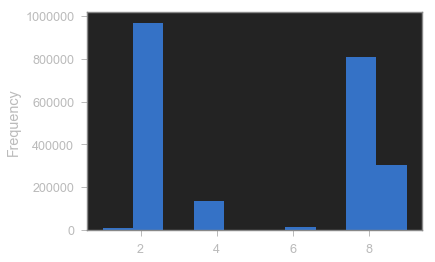

In [76]:
dataframe.Raca_Cor.plot.hist(bins=10)

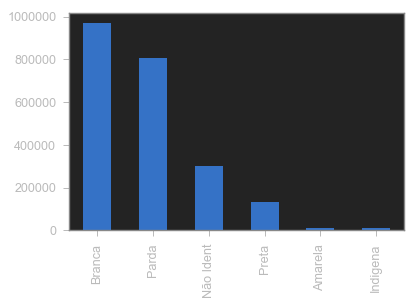

In [77]:
# Plotando um gráfico de barras
dataframe.Raca_Cor_STR.value_counts().plot(kind='bar')

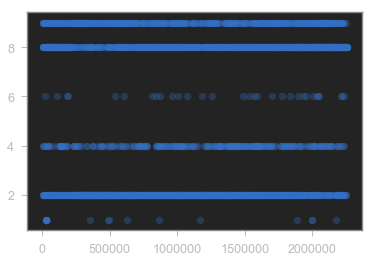

In [78]:
sample_raca_cor = dataframe.sample(5000)
plt.scatter(y=sample_raca_cor.Raca_Cor, x=sample_raca_cor.Raca_Cor.index, alpha=0.3)

In [79]:
df_racacor_vs_salario = dataframe[['Raca_Cor', 'Salario_Mensal']]
df_racacor_vs_salario.corr().round(2)

,Raca_Cor,Salario_Mensal
Raca_Cor,1.00,-0.08
Salario_Mensal,-0.08,1.00


In [80]:
# CRIANDO DATAFRAME SÓ DOS BRANCOS
filtrobrancos = dataframe['Raca_Cor_STR'] == "Branca"
dfbrancos = dataframe[filtrobrancos]
# CRIANDO DATAFRAME SÓ DOS PARDOS
filtropardos = dataframe['Raca_Cor_STR'] == "Parda"
dfpardos = dataframe[filtropardos]
# CRIANDO DATAFRAME DOS NÃO IDENTIFICADOS
filtronaoident = dataframe['Raca_Cor_STR'] == "Não Ident"
dfnaoident = dataframe[filtronaoident]
# CRIANDO DATAFRAME SÓ DOS PRETOS
filtropretas = dataframe['Raca_Cor_STR'] == "Preta"
dfpretas = dataframe[filtropretas]
# CRIANDO DATAFRAME SÓ DOS AMARELOS
filtroamarelas = dataframe['Raca_Cor_STR'] == "Amarela"
dfamarelos = dataframe[filtroamarelas]
# CRIANDO DATAFRAME INDIGENA
filtroindigena = dataframe['Raca_Cor_STR'] == "Indigena"
dfindigenas = dataframe[filtroindigena]

In [81]:
# CALCULANDO AS MÉDIAS E DESVIOS PADRÃO
# BRANCOS
mediadfbrancos = dfbrancos.log_salario.mean()
dpbrancos = dfbrancos.log_salario.std()
# PARDOS
mediapardos = dfpardos.log_salario.mean()
dppardos = dfpardos.log_salario.std()
# NÃO IDENTIFICADOS
medianaoident = dfnaoident.log_salario.mean()
dpnaoident = dfnaoident.log_salario.std()
# PRETOS
mediapretas = dfpretas.log_salario.mean()
dppretas = dfpretas.log_salario.std()
# AMARELOS
mediaamarelos = dfamarelos.log_salario.mean()
dpamarelos = dfamarelos.log_salario.std()
# INDIGENAS
mediaindigenas = dfindigenas.log_salario.mean()
dpindigenas = dfindigenas.log_salario.std()


In [82]:
print(f'brancos media= {mediadfbrancos} dp= {dpbrancos}')
print(f'pardos media= {mediapardos} dp= {dppardos}')
print(f'nao ident media= {medianaoident} dp= {dpnaoident}')
print(f'pretas media= {mediapretas} dp= {dppretas}')
print(f'amarelas media= {mediaamarelos} dp= {dpamarelos}')
print(f'indigenas media= {mediaindigenas} dp= {dpindigenas}')

brancos media= 7.308393959282515 dp= 0.5284640425226509
pardos media= 7.174311717051291 dp= 0.4209856968436536
nao ident media= 7.203077439726465 dp= 0.4181268102920843
pretas media= 7.1830787667184115 dp= 0.3938784615271023
amarelas media= 7.350754899909039 dp= 0.6416893634546512
indigenas media= 7.291292841834495 dp= 0.5208979985339196


In [83]:
print(stats.norm.interval(0.95, loc=mediaindigenas, scale=dpindigenas)[0])
print(stats.norm.interval(0.95, loc=mediadfbrancos, scale=dpbrancos)[0])

6.270351525089015
6.272623468813676


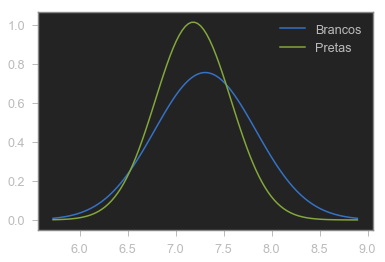

In [84]:
x = np.linspace(mediadfbrancos - 3*dpbrancos, mediadfbrancos + 3*dpbrancos, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.norm.pdf(x, mediadfbrancos, dpbrancos),label='Brancos')
ax.plot(x, stats.norm.pdf(x, mediapretas, dppretas),label='Pretas')
ax.legend(loc='best', frameon=False)

In [85]:
# BRANCOS VS PRETAS
scipy.stats.norm.interval(alpha=0.95, loc=mediadfbrancos, scale=dpbrancos)[0] < mediapretas < scipy.stats.norm.interval(alpha=0.95, loc=mediadfbrancos, scale=dpbrancos)[1] 

True

In [86]:
# PRETAS VS BRANCOS
scipy.stats.norm.interval(alpha=0.95, loc=mediapretas, scale=dppretas)[0] < mediadfbrancos < scipy.stats.norm.interval(alpha=0.95, loc=mediapretas, scale=dppretas)[1] 

True

In [87]:
# BRANCOS VS INDIGENAS
scipy.stats.norm.interval(alpha=0.95, loc=mediadfbrancos, scale=dpbrancos)[0] < mediaindigenas < scipy.stats.norm.interval(alpha=0.95, loc=mediadfbrancos, scale=dpbrancos)[1] 

True

In [88]:
# INDIGENAS VS BRANCOS
scipy.stats.norm.interval(alpha=0.95, loc=mediaindigenas, scale=dpindigenas)[0] < mediadfbrancos < scipy.stats.norm.interval(alpha=0.95, loc=mediaindigenas, scale=dpindigenas)[1] 

True

In [89]:
# BRANCOS VS PARDAS
scipy.stats.norm.interval(alpha=0.95, loc=mediadfbrancos, scale=dpbrancos)[0] < mediapardos < scipy.stats.norm.interval(alpha=0.95, loc=mediadfbrancos, scale=dpbrancos)[1] 

True

In [90]:
# PARDAS VS BRANCOS
scipy.stats.norm.interval(alpha=0.95, loc=mediapardos, scale=dppardos)[0] < mediadfbrancos < scipy.stats.norm.interval(alpha=0.95, loc=mediapardos, scale=dppardos)[1] 

True

## 8 Avançado: plote um SEABORN heatmap com todas as correlações das variávies numéricas entre si.

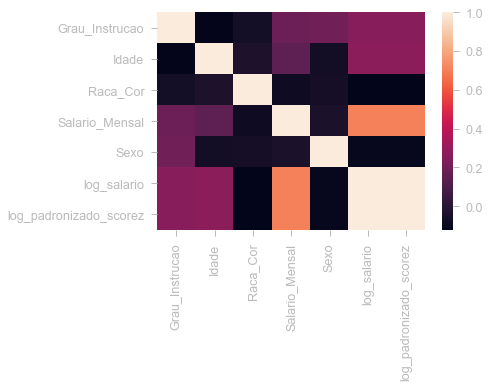

In [91]:
heat_map = sns.heatmap(dataframe.corr())
plt.show()